#END TO END ML PROJECT
##CALIFORNIA HOUSING DATASET

California House Price Prediction is a popular dataset used to practice building machine learning models for regression tasks. We will be following these steps to predict the house prices.

Step 1: Loading California House Price Dataset

The read_csv() method read a csv file to dataframe and the info() method helps to get a quick description of the data such as columns, the total number of rows, each attribute type and the number of nonnull values.

In [2]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/housing&energy-project last sem/housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


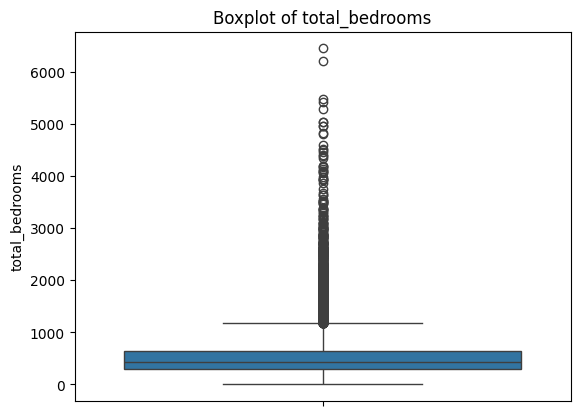

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df['total_bedrooms'])
plt.title('Boxplot of total_bedrooms')
plt.show()


In [5]:
Q1 = df['total_bedrooms'].quantile(0.25)
Q3 = df['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_bedrooms'] < lower_bound) | (df['total_bedrooms'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 1271


In [6]:
import warnings
warnings.filterwarnings('ignore')
median_val = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_val, inplace=True)


In [7]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
df.shape

(20640, 10)

In [9]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [10]:
# 2. Identify only numerical columns (exclude 'ocean_proximity')
num_cols = df.select_dtypes(include='number').columns.tolist()
print("Numerical Columns:", num_cols)


Numerical Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [11]:
len(num_cols)

9

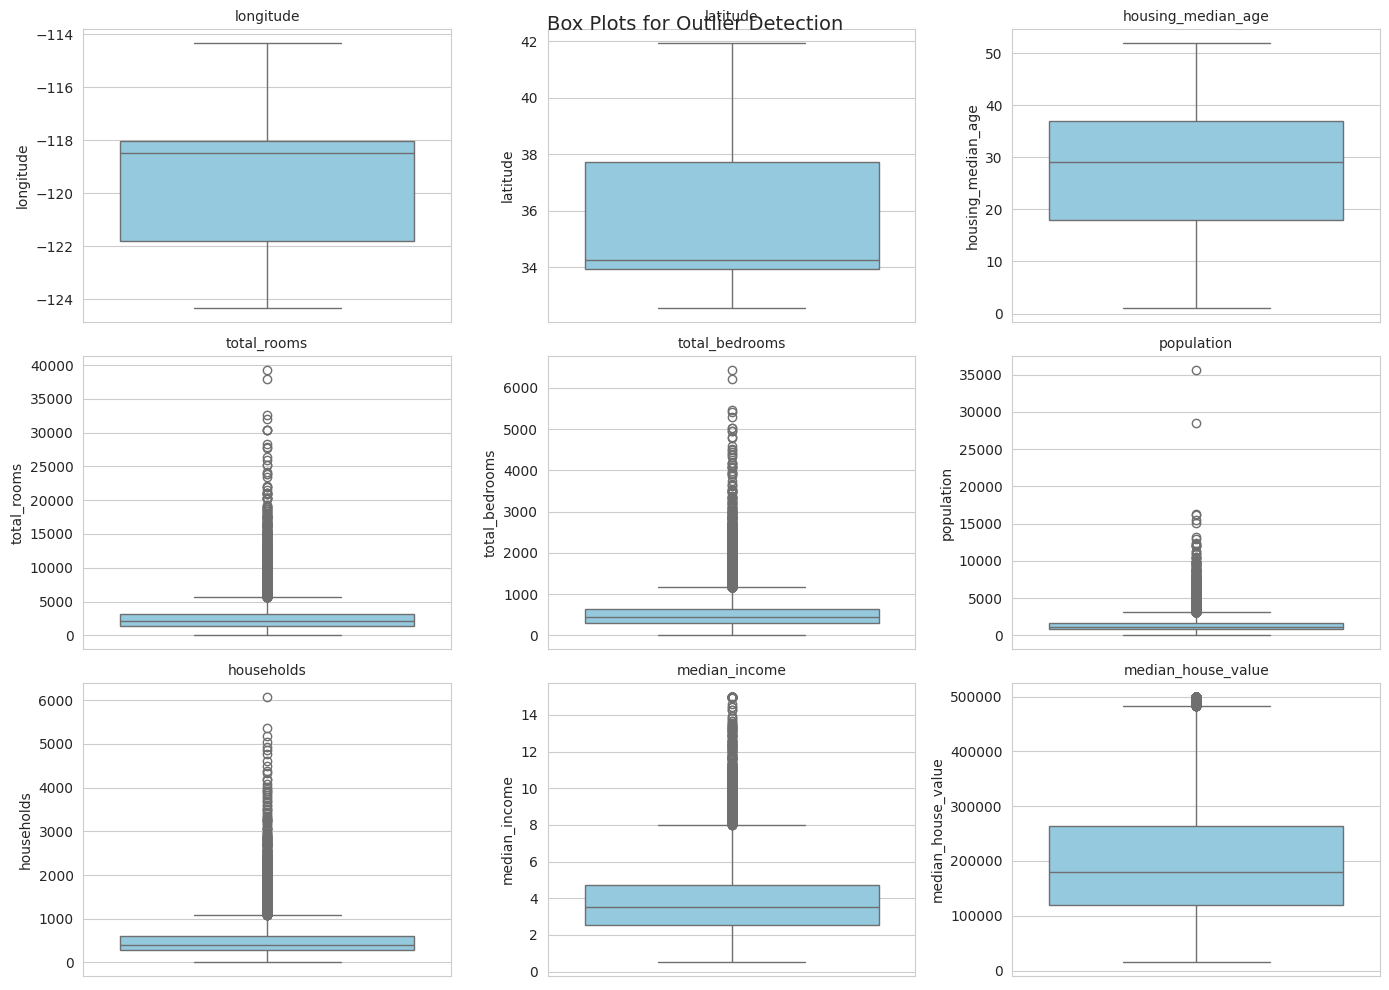

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# List of numerical columns
numerical_columns = df.select_dtypes(include='number').columns.tolist()

# Plot boxplots in a grid layout
plt.figure(figsize=(14, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)  # 3x3 grid; change to (4, 4) if you have more columns
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col, fontsize=10)
    plt.tight_layout()


plt.suptitle("Box Plots for Outlier Detection", fontsize=14)
plt.show()



In [13]:
# 3. Function to detect outliers using IQR method
def count_outliers_IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = column[(column < lower) | (column > upper)]
    return len(outliers)


In [14]:
# 4. Apply function and store outlier counts in a dictionary
outlier_counts = {col: count_outliers_IQR(df[col]) for col in num_cols}
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df.sort_values(by='Outlier Count', ascending=False)


,Outlier Count
total_bedrooms,1306
total_rooms,1287
households,1220
population,1196
median_house_value,1071
median_income,681
longitude,0
latitude,0
housing_median_age,0


In [15]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [16]:
outlier_columns = [
    'total_bedrooms',
    'total_rooms',
    'households',
    'population',
    'median_house_value',
    'median_income'
]

for col in outlier_columns:
    df = remove_outliers_iqr(df, col)

print("Remaining rows after outlier removal:", df.shape[0])


Remaining rows after outlier removal: 16811


In [17]:
outlier_counts = {col: count_outliers_IQR(df[col]) for col in num_cols}
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df.sort_values(by='Outlier Count', ascending=False)


,Outlier Count
median_house_value,256
total_rooms,177
total_bedrooms,128
households,79
median_income,62
population,46
longitude,0
latitude,0
housing_median_age,0


In [18]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# One-hot encode categorical variable
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Split features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (only needed for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression → RMSE:", rmse_lr, " | R²:", r2_lr)


Linear Regression → RMSE: 56410.738344100544  | R²: 0.6279274940380271


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest → RMSE:", rmse_rf, " | R²:", r2_rf)


Random Forest → RMSE: 43111.20222303338  | R²: 0.7826877146354777


In [21]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost → RMSE:", rmse_xgb, " | R²:", r2_xgb)


XGBoost → RMSE: 41386.86638572921  | R²: 0.7997239114110275


In [22]:
# 1. Feature Engineering
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']



In [23]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Correlation of all features with target
target_corr = corr_matrix['median_house_value'].sort_values(ascending=False)

print("Correlation with median_house_value:\n", target_corr)


Correlation with median_house_value:
 median_house_value            1.000000
median_income                 0.622476
total_rooms                   0.191044
ocean_proximity_NEAR BAY      0.156254
ocean_proximity_NEAR OCEAN    0.146452
households                    0.122390
housing_median_age            0.108809
total_bedrooms                0.090623
rooms_per_household           0.080467
ocean_proximity_ISLAND        0.036257
population                   -0.015087
longitude                    -0.035648
latitude                     -0.166156
bedrooms_per_room            -0.181695
population_per_household     -0.193182
ocean_proximity_INLAND       -0.513587
Name: median_house_value, dtype: float64


In [30]:
print(df.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'ocean_proximity_encoded'],
      dtype='object')


In [27]:
# Step 1: Identify the ocean proximity one-hot columns
one_hot_cols = ['ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
                'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

# Step 2: Get the category name by finding which column has 1 in each row
df['ocean_proximity'] = df[one_hot_cols].idxmax(axis=1)

# Step 3: Clean up the category names (remove the prefix)
df['ocean_proximity'] = df['ocean_proximity'].str.replace('ocean_proximity_', '')

# Step 4: Now apply label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ocean_proximity_encoded'] = le.fit_transform(df['ocean_proximity'])




In [29]:
# Step 5: Drop the original one-hot columns and the reconstructed 'ocean_proximity' text column
df = df.drop(columns=one_hot_cols + ['ocean_proximity'])

In [31]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Correlation of all features with target
target_corr = corr_matrix['median_house_value'].sort_values(ascending=False)

print("Correlation with median_house_value:\n", target_corr)


Correlation with median_house_value:
 median_house_value          1.000000
median_income               0.622476
ocean_proximity_encoded     0.220937
total_rooms                 0.191044
households                  0.122390
housing_median_age          0.108809
total_bedrooms              0.090623
rooms_per_household         0.080467
population                 -0.015087
longitude                  -0.035648
latitude                   -0.166156
bedrooms_per_room          -0.181695
population_per_household   -0.193182
Name: median_house_value, dtype: float64


In [32]:
features = ['median_income', 'ocean_proximity_encoded', 'total_rooms', 'households',
            'housing_median_age']
X = df[features]
y = df['median_house_value']


In [34]:
# 1. Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# 2. Define features and target
features = ['median_income', 'ocean_proximity_encoded', 'total_rooms', 'households', 'housing_median_age']
X = df[features]
y = df['median_house_value']

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression → RMSE: {rmse_lr:.2f} | R²: {r2_score(y_test, y_pred_lr):.4f}")

# 5. Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest → RMSE: {rmse_rf:.2f} | R²: {r2_score(y_test, y_pred_rf):.4f}")

# 6. XGBoost
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost → RMSE: {rmse_xgb:.2f} | R²: {r2_score(y_test, y_pred_xgb):.4f}")


Linear Regression → RMSE: 64184.63 | R²: 0.5183
Random Forest → RMSE: 63387.46 | R²: 0.5302
XGBoost → RMSE: 63520.39 | R²: 0.5282


In [35]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Correlation of all features with target
target_corr = corr_matrix['median_house_value'].sort_values(ascending=False)

print("Correlation with median_house_value:\n", target_corr)


Correlation with median_house_value:
 median_house_value          1.000000
median_income               0.622476
ocean_proximity_encoded     0.220937
total_rooms                 0.191044
households                  0.122390
housing_median_age          0.108809
total_bedrooms              0.090623
rooms_per_household         0.080467
population                 -0.015087
longitude                  -0.035648
latitude                   -0.166156
bedrooms_per_room          -0.181695
population_per_household   -0.193182
Name: median_house_value, dtype: float64


In [38]:
features = ['median_income', 'ocean_proximity_encoded', 'total_rooms', 'households',
            'housing_median_age','total_bedrooms',
    'rooms_per_household',
    'population',
    'longitude',
    'latitude',
    'bedrooms_per_room',
    'population_per_household']
X = df[features]
y = df['median_house_value']

In [39]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Define features and target
features = ['median_income', 'ocean_proximity_encoded', 'total_rooms', 'households',
            'housing_median_age', 'total_bedrooms', 'rooms_per_household', 'population',
            'longitude', 'latitude', 'bedrooms_per_room', 'population_per_household']

X = df[features]
y = df['median_house_value']

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train and evaluate Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression → RMSE: {rmse_lr:.2f} | R²: {r2_lr:.4f}")

# 6. Train and evaluate Random Forest (no scaling needed)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest → RMSE: {rmse_rf:.2f} | R²: {r2_rf:.4f}")

# 7. Train and evaluate XGBoost (no scaling needed)
xgb = XGBRegressor(random_state=42, eval_metric='rmse')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost → RMSE: {rmse_xgb:.2f} | R²: {r2_xgb:.4f}")


Linear Regression → RMSE: 57525.90 | R²: 0.6131
Random Forest → RMSE: 43556.90 | R²: 0.7782
XGBoost → RMSE: 41335.83 | R²: 0.8002


In [50]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define model
lgbm = lgb.LGBMRegressor(random_state=42)

# Parameter grid
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

# Grid search
grid_search = GridSearchCV(lgbm, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best RMSE (CV):", -grid_search.best_score_)

# Predict & evaluate
best_lgbm = grid_search.best_estimator_
y_pred = best_lgbm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 13448, number of used features: 12
[LightGBM] [Info] Start training from score 185448.958730
Best params: {'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 500, 'num_leaves': 50}
Best RMSE (CV): 40921.176309520626
Test RMSE: 38715.35
Test R²: 0.8247


In [52]:
from catboost import CatBoostRegressor

# 1. Initialize the model
catboost = CatBoostRegressor(verbose=0, random_seed=42)

# 2. Train the model
catboost.fit(X_train, y_train)

# 3. Predict on test data
y_pred = catboost.predict(X_test)

# 4. Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)  # squared=True by default
rmse = np.sqrt(mse)  # square root of MSE for RMSE
r2 = r2_score(y_test, y_pred)

print(f"CatBoost → RMSE: {rmse:.2f} | R²: {r2:.4f}")


CatBoost → RMSE: 38390.76 | R²: 0.8277


In [46]:
#!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [53]:
# 1. Import required libraries
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# 2. Predict on training and test sets
y_train_pred = catboost.predict(X_train)
y_test_pred = catboost.predict(X_test)

# 3. Calculate RMSE and R² for train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# 4. Calculate RMSE and R² for test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# 5. Display results
print("📊 CatBoost Overfitting Check:")
print(f"Train RMSE: {rmse_train:.2f} | R²: {r2_train:.4f}")
print(f"Test  RMSE: {rmse_test:.2f} | R²: {r2_test:.4f}")

# 6. Overfitting warning
if rmse_train < rmse_test * 0.8 and r2_train > r2_test + 0.1:
    print("⚠️ Potential overfitting detected.")
elif rmse_test > rmse_train * 1.2:
    print("⚠️ Model may be overfitting. Consider tuning.")
else:
    print("✅ Model generalizes well.")


📊 CatBoost Overfitting Check:
Train RMSE: 29588.13 | R²: 0.8987
Test  RMSE: 38390.76 | R²: 0.8277
⚠️ Model may be overfitting. Consider tuning.


In [54]:
# 1. Predictions
y_pred_train_lgb = best_lgbm.predict(X_train)
y_pred_test_lgb = best_lgbm.predict(X_test)

# 2. Evaluation (use your version of mean_squared_error without 'squared')
from sklearn.metrics import mean_squared_error, r2_score

rmse_train_lgb = mean_squared_error(y_train, y_pred_train_lgb) ** 0.5
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)

rmse_test_lgb = mean_squared_error(y_test, y_pred_test_lgb) ** 0.5
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)

# 3. Print metrics
print("📊 LightGBM Overfitting Check:")
print(f"Train RMSE: {rmse_train_lgb:.2f} | R²: {r2_train_lgb:.4f}")
print(f"Test  RMSE: {rmse_test_lgb:.2f} | R²: {r2_test_lgb:.4f}")

# 4. Overfitting warning logic
if rmse_train_lgb < rmse_test_lgb * 0.8 and r2_train_lgb > r2_test_lgb + 0.1:
    print("⚠️ Potential overfitting detected.")
elif rmse_test_lgb > rmse_train_lgb * 1.2:
    print("⚠️ Model may be overfitting. Consider tuning.")
else:
    print("✅ Model generalizes well.")


📊 LightGBM Overfitting Check:
Train RMSE: 22338.79 | R²: 0.9422
Test  RMSE: 38715.35 | R²: 0.8247
⚠️ Potential overfitting detected.


In [57]:
# ✅ Import
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ✅ Refit model
xgb = XGBRegressor(random_state=42, eval_metric='rmse')
xgb.fit(X_train, y_train)

# ✅ Predict on train and test
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

# ✅ Evaluate
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# ✅ Print results
print("📊 XGBoost Overfitting Check:")
print(f"Train RMSE: {rmse_train_xgb:.2f} | R²: {r2_train_xgb:.4f}")
print(f"Test  RMSE: {rmse_test_xgb:.2f} | R²: {r2_test_xgb:.4f}")

# ✅ Overfitting logic
if rmse_train_xgb < rmse_test_xgb * 0.8 and r2_train_xgb > r2_test_xgb + 0.1:
    print("⚠️ Potential overfitting detected.")
elif rmse_test_xgb > rmse_train_xgb * 1.2:
    print("⚠️ Model may be overfitting. Consider tuning.")
else:
    print("✅ Model generalizes well.")


📊 XGBoost Overfitting Check:
Train RMSE: 22434.94 | R²: 0.9417
Test  RMSE: 41335.83 | R²: 0.8002
⚠️ Potential overfitting detected.


In [58]:
# ✅ Import necessary modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ✅ Train RandomForest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# ✅ Predict on training and testing data
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# ✅ Calculate RMSE and R²
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# ✅ Print performance
print("📊 Random Forest Overfitting Check:")
print(f"Train RMSE: {rmse_train_rf:.2f} | R²: {r2_train_rf:.4f}")
print(f"Test  RMSE: {rmse_test_rf:.2f} | R²: {r2_test_rf:.4f}")

# ✅ Overfitting warning logic
if rmse_train_rf < rmse_test_rf * 0.8 and r2_train_rf > r2_test_rf + 0.1:
    print("⚠️ Potential overfitting detected.")
elif rmse_test_rf > rmse_train_rf * 1.2:
    print("⚠️ Model may be overfitting. Consider tuning.")
else:
    print("✅ Model generalizes well.")


📊 Random Forest Overfitting Check:
Train RMSE: 16597.93 | R²: 0.9681
Test  RMSE: 43556.90 | R²: 0.7782
⚠️ Potential overfitting detected.


In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 3, 5],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)


Best params: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 200}


In [60]:
# 1. Train the Random Forest model with best hyperparameters
from sklearn.ensemble import RandomForestRegressor

rf_best = RandomForestRegressor(
    max_depth=15,
    min_samples_leaf=1,
    n_estimators=200,
    random_state=42
)

rf_best.fit(X_train, y_train)

# 2. Predict on train and test sets
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# 3. Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {rmse_train:.2f} | Train R²: {r2_train:.4f}")
print(f"Test RMSE: {rmse_test:.2f} | Test R²: {r2_test:.4f}")

# 4. Check for overfitting
if rmse_train < rmse_test * 0.8 and r2_train > r2_test + 0.1:
    print("⚠️ Potential overfitting detected.")
elif rmse_test > rmse_train * 1.2:
    print("⚠️ Model may be overfitting. Consider tuning more.")
else:
    print("✅ Model generalizes well.")


Train RMSE: 20701.27 | Train R²: 0.9504
Test RMSE: 43622.59 | Test R²: 0.7775
⚠️ Potential overfitting detected.


In [62]:
rf_tuned = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=5,
    max_features='sqrt',
    n_estimators=200,
    random_state=42
)
rf_tuned.fit(X_train, y_train)

y_train_pred = rf_tuned.predict(X_train)
y_test_pred = rf_tuned.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {rmse_train:.2f} | Train R²: {r2_train:.4f}")
print(f"Test RMSE: {rmse_test:.2f} | Test R²: {r2_test:.4f}")

# 4. Check for overfitting
if rmse_train < rmse_test * 0.8 and r2_train > r2_test + 0.1:
    print("⚠️ Potential overfitting detected.")
elif rmse_test > rmse_train * 1.2:
    print("⚠️ Model may be overfitting. Consider tuning more.")
else:
    print("✅ Model generalizes well.")


Train RMSE: 41821.53 | Train R²: 0.7976
Test RMSE: 47392.87 | Test R²: 0.7374
✅ Model generalizes well.


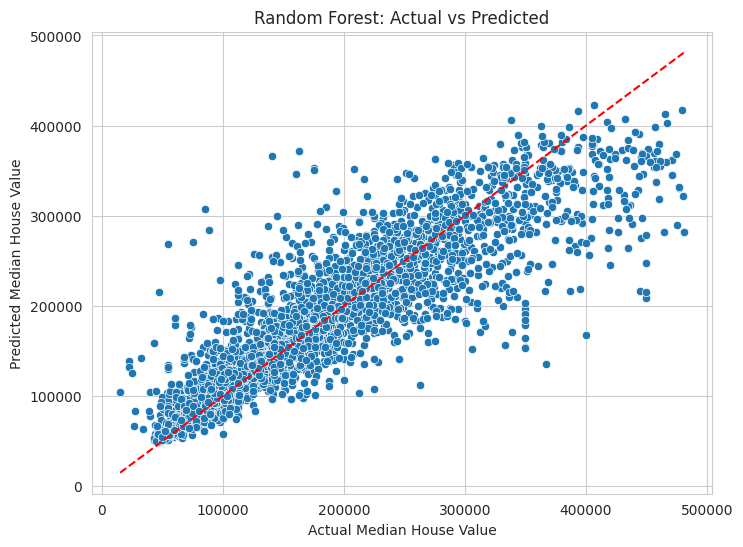

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Random Forest: Actual vs Predicted')
plt.show()


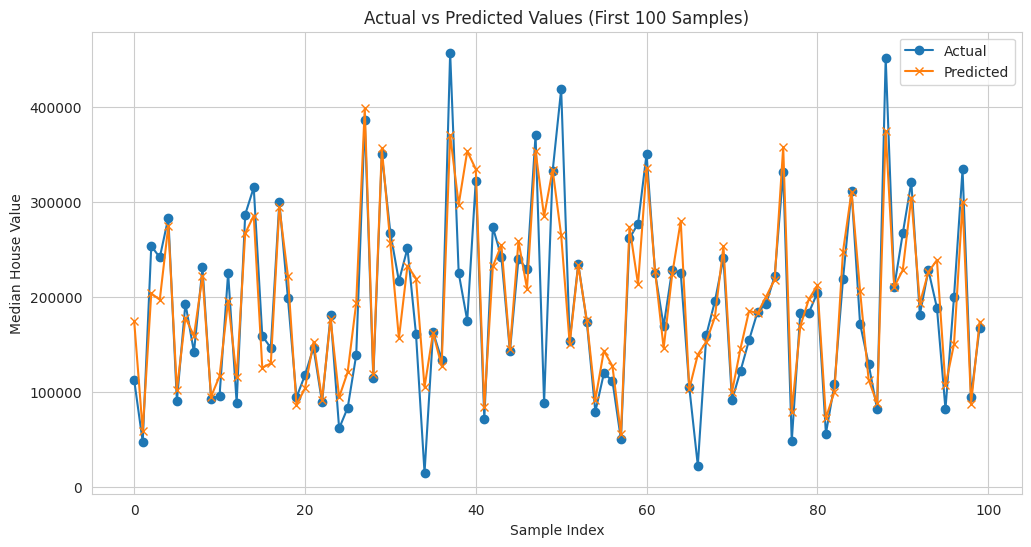

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_rf[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend()
plt.show()


In [71]:
# Show 5 actual vs predicted values
import pandas as pd

comparison_df = pd.DataFrame({
    'Actual': y_test[:5].values,
    'Predicted': y_pred_rf[:5]
})

print(comparison_df)


     Actual  Predicted
0  112500.0   174411.0
1   47500.0    59269.0
2  253300.0   203522.0
3  241400.0   196932.0
4  283100.0   274700.0


In [72]:
comparison_df['Error'] = comparison_df['Predicted'] - comparison_df['Actual']
comparison_df['Percent_Error'] = (comparison_df['Error'] / comparison_df['Actual']) * 100
print(comparison_df)


     Actual  Predicted    Error  Percent_Error
0  112500.0   174411.0  61911.0      55.032000
1   47500.0    59269.0  11769.0      24.776842
2  253300.0   203522.0 -49778.0     -19.651796
3  241400.0   196932.0 -44468.0     -18.420878
4  283100.0   274700.0  -8400.0      -2.967149
